In [6]:
# This is a code analysing the RR_Lyrae stars on Stripe_82
from __future__ import print_function
import gatspy
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import numpy as np
from gatspy import periodic
from gatspy.periodic import LombScargleMultiband
import astroML
import random
print(astroML.__file__)
print(gatspy.__file__)
import numpy
print(numpy.__file__)
%matplotlib inline
#The documentations are all recordeed here : 
#http://www.astroml.org/gatspy/
#http://www.astroml.org/gatspy/datasets/rrlyrae.html
#http://nbviewer.jupyter.org/github/astroML/gatspy/blob/master/examples/MultiBand.ipynb

//anaconda/lib/python2.7/site-packages/astroML/__init__.pyc
//anaconda/lib/python2.7/site-packages/gatspy/__init__.pyc
//anaconda/lib/python2.7/site-packages/numpy/__init__.pyc


In [7]:
# Getting the data from a server
from gatspy.datasets import fetch_rrlyrae
rrlyrae = fetch_rrlyrae()
len(rrlyrae.ids)

483

In [8]:
# Getting the fits meta-data from a server ; the stars index from 0,1,2,3.....,482
i=21
lcid = rrlyrae.ids[i]
t, mag, dmag, filts = rrlyrae.get_lightcurve(lcid)
metadata = rrlyrae.get_metadata(lcid)
print(metadata.dtype.names)

('id', 'type', 'P', 'uA', 'u0', 'uE', 'uT', 'gA', 'g0', 'gE', 'gT', 'rA', 'r0', 'rE', 'rT', 'iA', 'i0', 'iE', 'iT', 'zA', 'z0', 'zE', 'zT')


In [9]:
#This literally just tells you that the filters are u,r,i,z,g
#print(filts)


In [10]:
# Finding the shape of the array
t.shape,filts.shape

((279,), (279,))

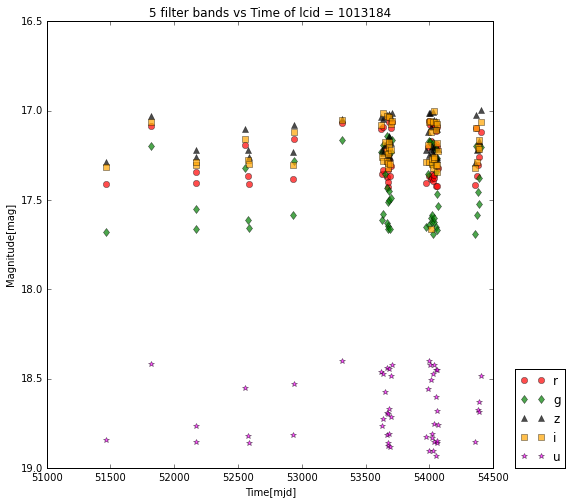

In [11]:
# Plotting the rr_lyrae stars : filter_band vs Time
# The r-band filter
plt.figure(figsize=(8,8))
# The r-band filter
plt.plot(t[filts=='r'],mag[filts=='r'],marker='o',linestyle='none',color='red',alpha=0.7,label='r')
# The g-band filter
plt.plot(t[filts=='g'],mag[filts=='g'],marker='d',linestyle='none',color='green',alpha=0.7,label='g')
# The z-band filter
plt.plot(t[filts=='z'],mag[filts=='z'],marker='^',linestyle='none',color='black',alpha=0.7,label='z')
# The i-band filter
plt.plot(t[filts=='i'],mag[filts=='i'],marker='s',linestyle='none',color='orange',alpha=0.7,label='i')
# The u-band filter
plt.plot(t[filts=='u'],mag[filts=='u'],marker='*',linestyle='none',color='magenta',alpha=0.7,label='u')
plt.ylim(plt.ylim()[::-1])
# The axis
plt.xlabel('Time[mjd]')
plt.ylabel('Magnitude[mag]')
# The Legend
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0.)
plt.title('5 filter bands vs Time of lcid = 1013184')

In [12]:
# First assignement figure : 
# plot all 5 colors and color code them all in the same plot
# put id in title
# Remark : DONE !!!!!!!!

In [13]:
# Second assignment :
# make a plot of magnitude vs phase 
# Remark :DONE !!!!!!!! 

In [14]:
# Getting the Period and the phase 
period = metadata['P']
phase = (t / period) % 1 

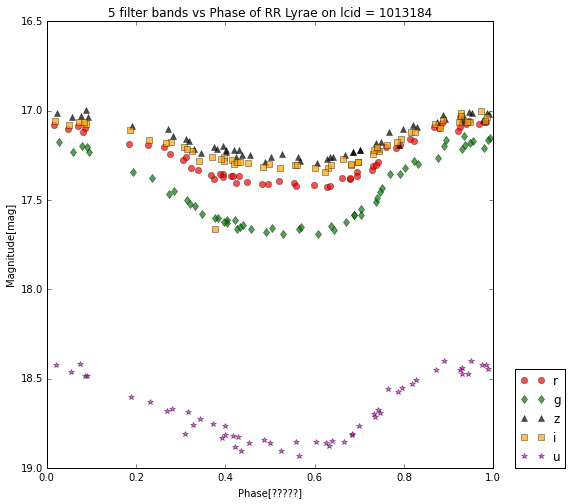

In [15]:
# Make a plot of magnitude vs phase1

# The r-band filter
plt.figure(figsize=(8,8))
# The r-band filter
plt.plot(phase[filts=='r'],mag[filts=='r'],marker='o',linestyle='none',color='red',alpha=0.7,label='r')
# The g-band filter
plt.plot(phase[filts=='g'],mag[filts=='g'],marker='d',linestyle='none',color='green',alpha=0.7,label='g')
# The z-band filter
plt.plot(phase[filts=='z'],mag[filts=='z'],marker='^',linestyle='none',color='black',alpha=0.7,label='z')
# The i-band filter
plt.plot(phase[filts=='i'],mag[filts=='i'],marker='s',linestyle='none',color='orange',alpha=0.7,label='i')
# The u-band filter
plt.plot(phase[filts=='u'],mag[filts=='u'],marker='*',linestyle='none',color='magenta',alpha=0.7,label='u')
plt.ylim(plt.ylim()[::-1])
# The axis
plt.xlabel('Phase[?????]')
plt.ylabel('Magnitude[mag]')
# The Legend
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0.)
plt.title('5 filter bands vs Phase of RR Lyrae on lcid = 1013184')



In [16]:
# Third assignment :
# Plot all stars on the sky (e.g., in RA, Dec)
# Remark : DONE !!!!!

In [17]:
# Getting the observing meta-data from a server
obsmeta = rrlyrae.get_obsmeta(lcid)
print(obsmeta.dtype.names)

('id', 'RA', 'DEC', 'rExt', 'd', 'RGC', 'u', 'g', 'r', 'i', 'z', 'V', 'ugmin', 'ugmin_err', 'grmin', 'grmin_err')


In [18]:
# Getting the RA and DEC of all stars into one list
ra = []
dec = []
for i in range(len(rrlyrae.ids)):
    lcid = rrlyrae.ids[i]
    obsmeta = rrlyrae.get_obsmeta(lcid)    
    ra.append(obsmeta['RA'])
    dec.append(obsmeta['DEC'])
#print(ra,dec)

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


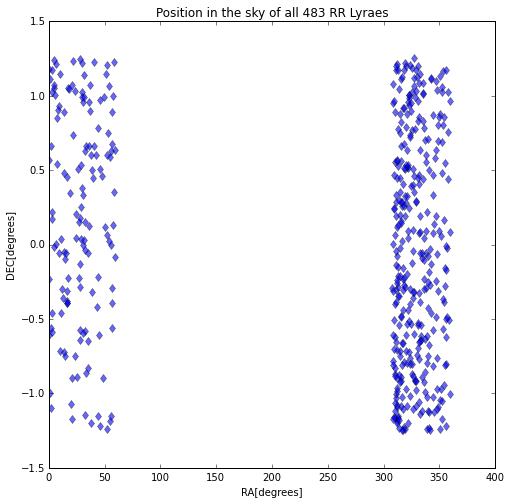

In [19]:
# Plot all stars on the sky (e.g., in RA, Dec)
plt.figure(figsize=(8,8))
# The r-band filter
plt.plot(ra,dec,marker='d',linestyle='none',color='blue',alpha=0.6)
# The axis
plt.xlabel('RA[degrees]')
plt.ylabel('DEC[degrees]')
# The Legend
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0.)
plt.title('Position in the sky of all 483 RR Lyraes')

In [20]:
# Fourth assignment :
# Plot for period of a star vs rband_Amplitude( this is just 'rA' -- this is not right ascension)
# Remark : DONE !!!!!!!!

In [21]:
# Getting the rband_Amplitude and period of all starS
rA = []
period = []
for i in range(len(rrlyrae.ids)):
    lcid = rrlyrae.ids[i]
    metadata = rrlyrae.get_metadata(lcid)
    rA.append(metadata['rA'])
    period.append(metadata['P'])
#print (rA,period)

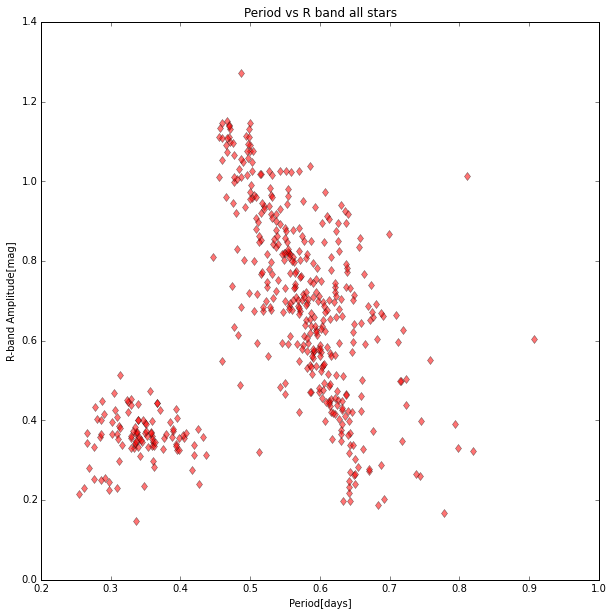

In [22]:
# Plot for period of a star vs rband_Amplitude( this is just 'rA' -- this is not right ascension)
plt.figure(figsize=(10,10))
# The r-band filter
plt.plot(period,rA,marker='d',linestyle='none',color='red',alpha=0.55,label='r')
# The axis
plt.xlabel('Period[days]')
plt.ylabel('R-band Amplitude[mag]')
# The title
title = 'Period vs R band all stars'
plt.title(title)

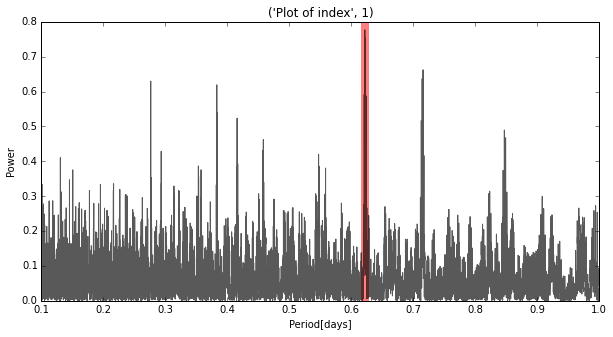

In [17]:
# Sixth assignment :
# Try to make a periodogram of one of the stars. 
i=1
lcid = rrlyrae.ids[i]
metadata = rrlyrae.get_metadata(lcid)
t, mag, dmag, filts = rrlyrae.get_lightcurve(lcid)

# This is it, this is your LombScargle code !
model = periodic.LombScargle(center_data=False,fit_offset=True)
model.optimizer.period_range = (0.1, 1.)   

# This is all fitted with 4.2 Truncated Fourier Models with VanderPlas paper
model.fit(t[filts=='r'],mag[filts=='r'],dmag[filts=='r'])

# Number of observations
t[filts=='r'].size

# Compute the scores on a grid of periods
plt.figure(figsize=(10,5))
periods = np.linspace(0.1, 1., 10000)
scores = model.score(periods)
plt.axvline(metadata['P'],color='red',linewidth=8,alpha=0.5)
plt.plot(periods,scores,color = 'black',alpha=0.65)

# The axis
plt.xlabel('Period[days]')
plt.ylabel('Power')
title = 'Plot of index',i
plt.title(title)

In [18]:
# Assignment 6.5
# Make a blogspot.
# Remark : DONE !!!!!

In [19]:
# Assignment 7 
# Make a few more periodgrams , make a handful more. 
# Remark : DONE !!!!!

# Look at how ( by eye ) how the number of observations & how
#it affects the noise 

# Fainter stars will have more dmag noise and this will increase 
#the amount of noise

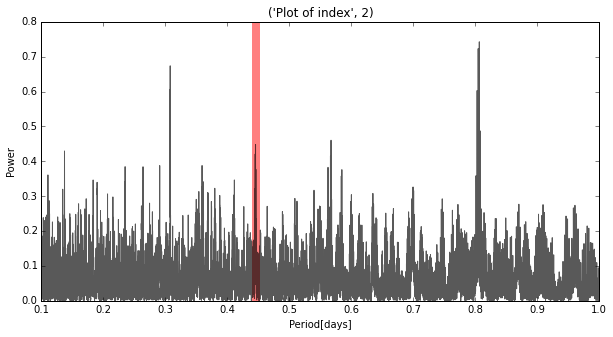

In [75]:
# Assignment 7 
# Try to make a periodogram of one of the stars. 
i=2
lcid = rrlyrae.ids[i]
metadata = rrlyrae.get_metadata(lcid)
t, mag, dmag, filts = rrlyrae.get_lightcurve(lcid)

# This is it, this is your LombScargle code !
model = periodic.LombScargle(center_data=False,fit_offset=True)
model.optimizer.period_range = (0.1, 1.)   

# This is all fitted with 4.2 Truncated Fourier Models with VanderPlas paper
model.fit(t[filts=='r'],mag[filts=='r'],dmag[filts=='r'])

# Number of observations
t[filts=='r'].size

# Compute the scores on a grid of periods
plt.figure(figsize=(10,5))
periods = np.linspace(0.1, 1., 10000)
scores = model.score(periods)
plt.axvline(metadata['P'],color='red',linewidth=8,alpha=0.5)
plt.plot(periods,scores,color = 'black',alpha=0.65)

# The axis
plt.xlabel('Period[days]')
plt.ylabel('Power')
title = 'Plot of index',i
plt.title(title)

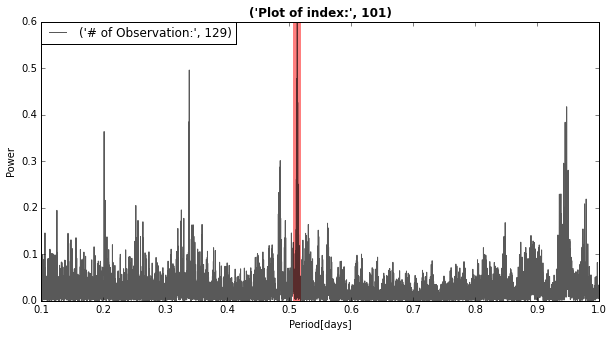

In [76]:
# Assignment 8a 
# Plot me the periodogram based on the index I give you
# This plots you a lot of periodograms
def plot_periodogram(i,model):
    # these are the ids of the rr lyrae
    lcid = rrlyrae.ids[i]
    metadata = rrlyrae.get_metadata(lcid)
    t, mag, dmag, filts = rrlyrae.get_lightcurve(lcid)
    
    # This is it, this is your LombScargle code !
    model = periodic.LombScargle(center_data=False,fit_offset=True)
    model.optimizer.period_range = (0.1, 1.)   
    
    # This is all fitted with 4.2 Truncated Fourier Models with VanderPlas paper
    model.fit(t[filts=='r'],mag[filts=='r'],dmag[filts=='r'])
    
    # Number of observations
    nobs = t[filts=='r'].size
    
    #print(i,nobs)
    legend ='# of Observation:',nobs
    
    # Compute the scores on a grid of periods
    plt.figure(figsize=(10,5))
    periods = np.linspace(0.1, 1., 10000)
    scores = model.score(periods)
    plt.axvline(metadata['P'],color='red',linewidth=8,alpha=0.5)
    plt.plot(periods,scores,color = 'black',alpha=0.65,label = legend)
    
    # The axis
    plt.xlabel('Period[days]')
    plt.ylabel('Power')
    title = 'Plot of index:',i
    plt.title(title,fontweight='bold',fontsize=12)
    
    # The Legend
    plt.legend(bbox_to_anchor=(0, 1.0), loc=2, borderaxespad=0.)

    
# Plot me lotsa periodograms

#listoindex = [101,26,11,334,33,289,14,59,82,173]
listoindex = [101]
for i in listoindex:
    plot_periodogram(i,model)
    
# Plot all the periodogram
#for i in range(len(rrlyrae.ids)):
#    plot_periodogram(i,model)
    

Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 149895 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 149895 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 149895 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 149895 steps
Zooming-in on 5 candidate peaks:
 - Compu

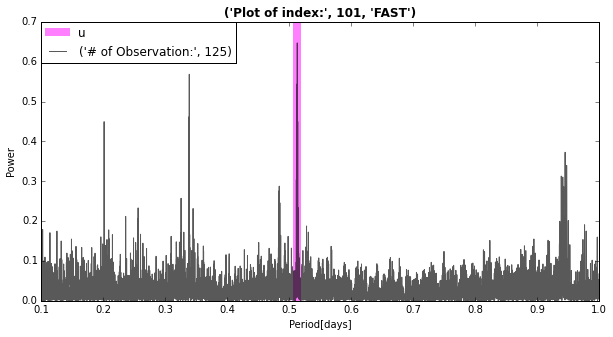

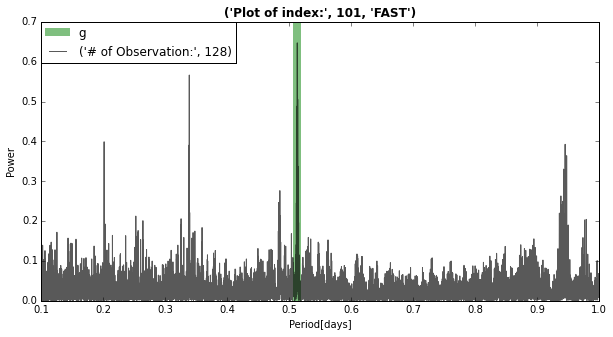

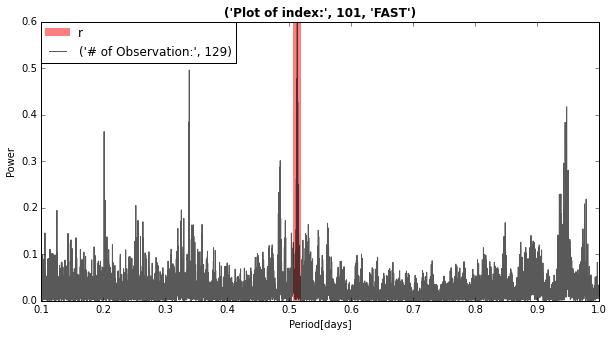

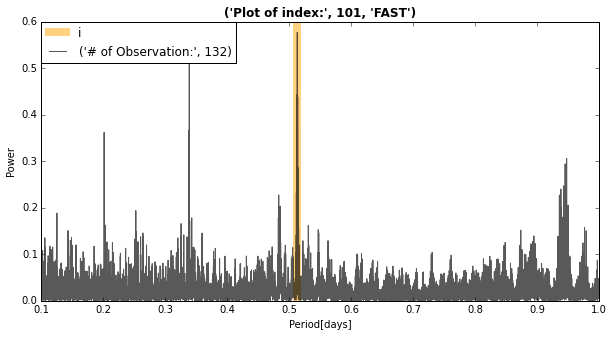

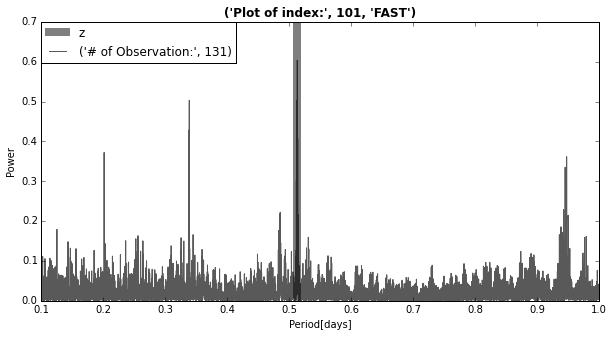

In [77]:
# Assignment 8b
# Do the same thing with LombScargleMultiband ( exactly as above ) , 
# on u,g,r,i,z stars
# Try to make a periodogram of one of the stars. 
# Remark : DONE !!!!!!.... .... I think...
def plot_periodogram_fast(i,model,color):
    # these are the ids of the rr lyrae
    lcid = rrlyrae.ids[i]
    metadata = rrlyrae.get_metadata(lcid)
    t, mag, dmag, filts = rrlyrae.get_lightcurve(lcid)
    
    # Let's fit it
    model.optimizer.period_range = (0.1, 1.) 
    
    # This is all fitted with 4.2 Truncated Fourier Models with VanderPlas paper
    model.fit(t[filts==color],mag[filts==color],dmag[filts==color])
    model.best_period
    
    # Number of observations
    nobs = t[filts==color].size
    legend ='# of Observation:',nobs
    
    # The marker color
    if color == 'u': markercolor='magenta'
    if color == 'g': markercolor='green'
    if color == 'r': markercolor='red'
    if color == 'i': markercolor='orange'
    if color == 'z': markercolor='black'
        
    # Compute the scores on a grid of periods
    plt.figure(figsize=(10,5))
    periods = np.linspace(0.1, 1., 10000)
    scores = model.score(periods)
    plt.axvline(metadata['P'],color=markercolor,linewidth=8,alpha=0.5,label = color)
    plt.plot(periods,scores,color = 'black',alpha=0.65,label = legend)
    
    # The axis
    plt.xlabel('Period[days]')
    plt.ylabel('Power')
    title = 'Plot of index:',i,'FAST'
    plt.title(title,fontweight='bold',fontsize=12)
    
    # The Legend
    plt.legend(bbox_to_anchor=(0, 1.0), loc=2, borderaxespad=0.)
    
#listoindex = [101,26,11,334,33,289,14,59,82,173]  

# This is it, this is your LombScargle code !
model = periodic.LombScargleFast(fit_period=True)

# Plot me those periodograms !!
colors=['u','g','r','i','z']
lisofindex_fast=[101]
for i in lisofindex_fast:
    for color in colors:
        plot_periodogram_fast(i,model,color)    
    

Finding optimal frequency:
 - Estimated peak width = 0.00432
 - Using 5 steps per peak; omega_step = 0.000864
 - User-specified period range:  0.1 to 1
 - Computing periods at 65437 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


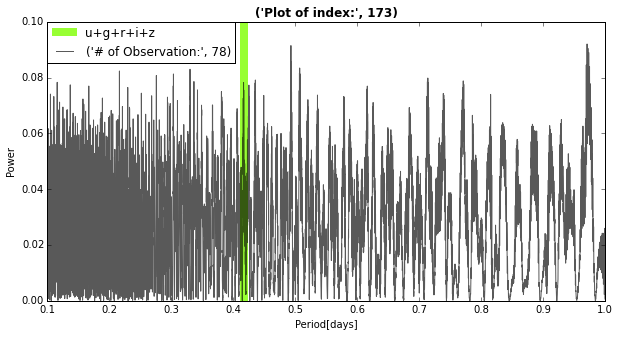

In [78]:
# Assignment 8
# Do the same thing with LombScargleMultiband ( exactly as above ) , 
# on u,g,r,i,z stars.... but on all the colours combined !
# Try to make a periodogram of one of the stars. 
# Remark : DONE !!!!!!.... .... I think...
def plot_periodogram_multi(i,model):
    # these are the ids of the rr lyrae
    lcid = rrlyrae.ids[i]
    metadata = rrlyrae.get_metadata(lcid)
    t, mag, dmag, filts = rrlyrae.get_lightcurve(lcid)
    
    # Let's fit it
    model.optimizer.period_range = (0.1, 1.) 
    
    # This is all fitted with 4.2 Truncated Fourier Models with VanderPlas paper
    model.fit(t,mag,dmag)
    model.best_period
    
    # Number of observations
    nobs = t.size
    
    #print(i,nobs)
    legend ='# of Observation:',nobs
    
    # Compute the scores on a grid of periods
    plt.figure(figsize=(10,5))
    periods = np.linspace(0.1, 1., 10000)
    scores = model.score(periods)
    plt.axvline(metadata['P'],color='chartreuse',linewidth=8,alpha=0.8,label='u+g+r+i+z')
    plt.plot(periods,scores,color = 'black',alpha=0.65,label = legend)

    # The axis
    plt.xlabel('Period[days]')
    plt.ylabel('Power')
    title = 'Plot of index:',i
    plt.title(title,fontweight='bold',fontsize=12)
    
    # The Legend
    plt.legend(bbox_to_anchor=(0, 1.0), loc=2, borderaxespad=0.)
    
#listoindex_multi = [101,26,11,334,33,289,14,59,82,173] 

# This is it, this is your LombScargle code !
model = periodic.LombScargleMultiband(fit_period=True)

# Plot me those periodograms !!
lisofindex_multi=[173]
for i in lisofindex_multi:
    plot_periodogram_multi(i,model)    
    

In [79]:
# Assignment 9 
# For all light curves in Assignment 8, use the multiband to best 
#fit their periods. 
# And then plot my best period vs Vandplas periods

Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 149895 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00281
 - Using 5 steps per peak; omega_step = 0.000561
 - User-specified period range:  0.1 to 1
 - Computing periods at 100795 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00188
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 150164 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
[101, 26, 11]
[0.51342575954230252, 0.31561733153024968, 0.55921195416349678]
[0.51342475, 0.31561667, 0.55920964]


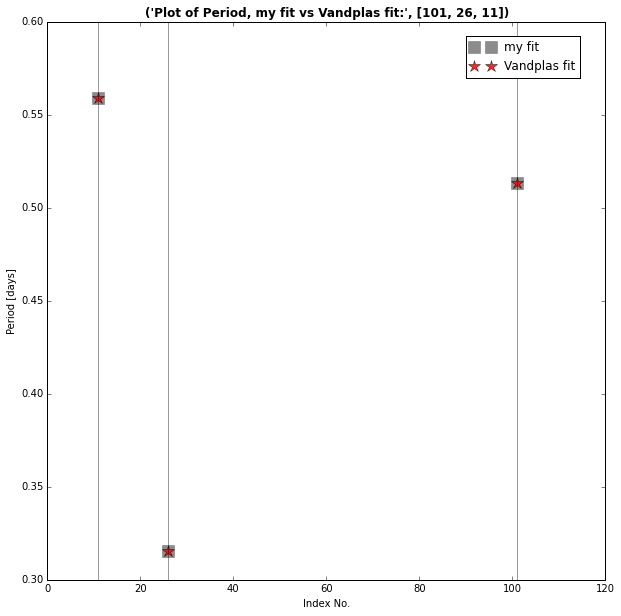

In [80]:
# Assignment 9 
# For all light curves in Assignment 8, use the multiband to best 
# fit their periods. 
# And then plot my best period vs Vandplas periods
# Remark : 
def find_period_multi(i,model,my_best,V_best) :
    # these are the ids of the rr lyrae
    lcid = rrlyrae.ids[i]
    metadata = rrlyrae.get_metadata(lcid)
    t, mag, dmag, filts = rrlyrae.get_lightcurve(lcid)
    
    # Let's fit it
    model.optimizer.period_range = (0.1, 1.) 
    
    # This is all fitted with 4.2 Truncated Fourier Models with VanderPlas paper
    model.fit(t,mag,dmag)
    best = model.best_period
    
    # Finding my period
    my_best.append(np.mean(best))
    
    # Finding Vanplas period
    V_best.append(metadata['P'])
    
    #print(period,'\n')
    #print(VP)
       
# Find me all the different periods between my best fit, and Vanderplas best fit
my_best = []
V_best = []
listofindex = [101,26,11] 
#listofindex = [101,26,11,334,33,289,14,59,82,173] 

# This is it, this is your LombScargle code !
model = periodic.LombScargleMultiband(fit_period=True)

# Plot me those different periods !!
for i in listofindex:
    find_period_multi(i,model,my_best,V_best) 
    
# Uncover to see what I am plotting !    
print(listofindex)
print(my_best)
print(V_best)

# Plot me those points of different periods
plt.figure(figsize=(10,10))
plt.plot(listofindex,my_best,marker='s',markersize=12,linestyle='none',color='black',alpha=0.45,label='my fit')
plt.plot(listofindex,V_best,marker='*',markersize=12,linestyle='none',color='red',alpha=0.85,label = 'Vandplas fit')
for i in listofindex:
    plt.axvline(i,color='black',linewidth=1,alpha=0.4)
    
# The axis
plt.xlabel('Index No.')
plt.ylabel('Period [days]')
title = 'Plot of Period, my fit vs Vandplas fit:',listofindex
plt.legend(bbox_to_anchor=(0.75, 0.9), loc=3, borderaxespad=0.)
plt.title(title,fontweight='bold',fontsize=12)

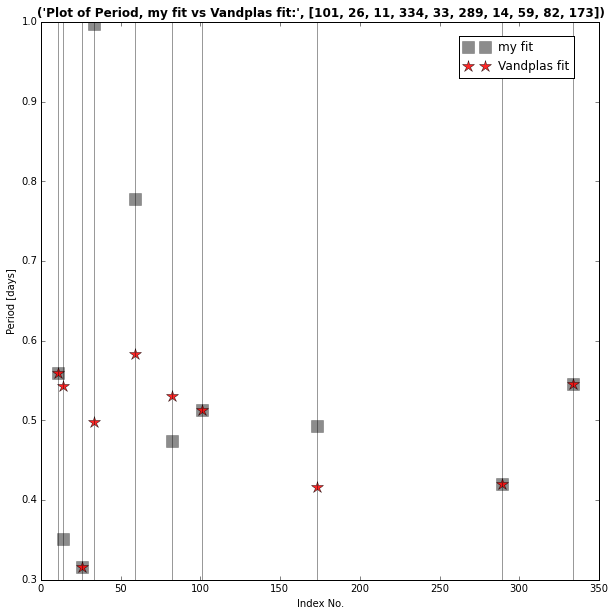

In [81]:
# This cell is a quick way to fix the plot's colors without having to fit everything again
# The input
listofindex=[101, 26, 11, 334, 33, 289, 14, 59, 82, 173]
my_best=[0.51342575954230252, 0.31561733153024968, 0.55921195416349678, 0.54569697928237881, 0.99699970257407988, 0.41993525590850195, 0.35177071655039449, 0.77786494966805897, 0.47466322957580426, 0.4925506664031935]
V_best=[0.51342475, 0.31561667, 0.55920964, 0.54569745, 0.49856448, 0.4199369, 0.54266459, 0.58333933, 0.53016245, 0.41647157]

# The plot
plt.figure(figsize=(10,10))
plt.plot(listofindex,my_best,marker='s',markersize=12,linestyle='none',color='black',alpha=0.45,label='my fit')
plt.plot(listofindex,V_best,marker='*',markersize=12,linestyle='none',color='red',alpha=0.85,label = 'Vandplas fit')
for i in listofindex:
    plt.axvline(i,color='black',linewidth=1,alpha=0.4)
    
# The axis
plt.xlabel('Index No.')
plt.ylabel('Period [days]')
title = 'Plot of Period, my fit vs Vandplas fit:',listofindex
plt.legend(bbox_to_anchor=(0.75, 0.9), loc=3, borderaxespad=0.)
plt.title(title,fontweight='bold',fontsize=12)

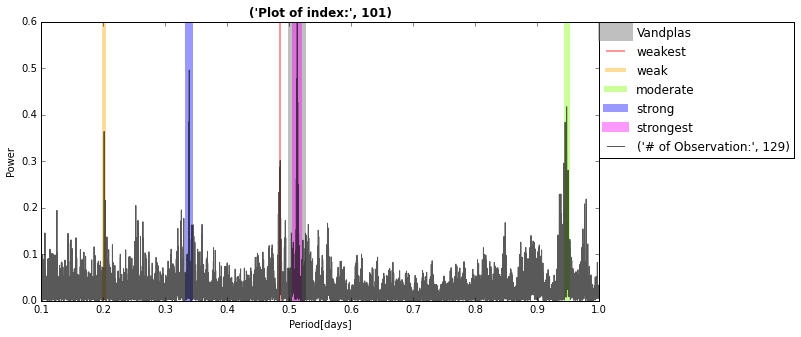

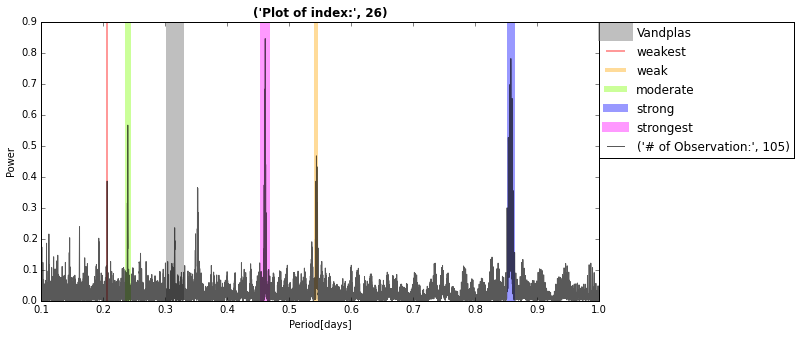

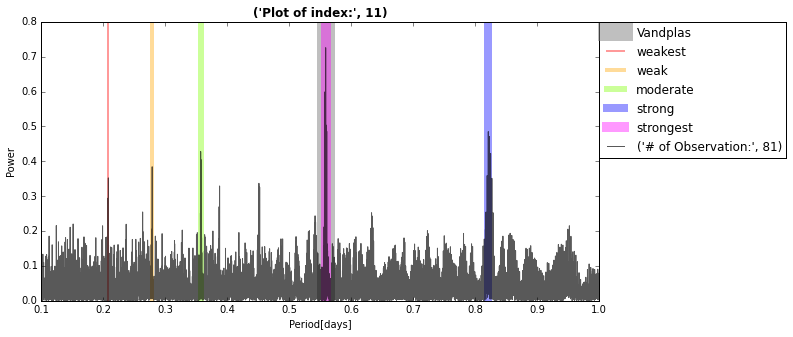

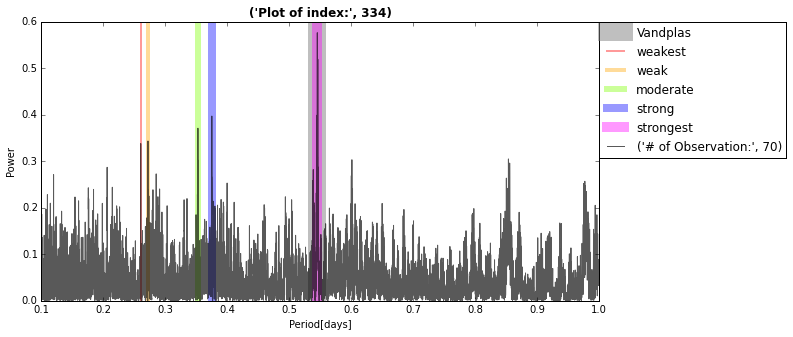

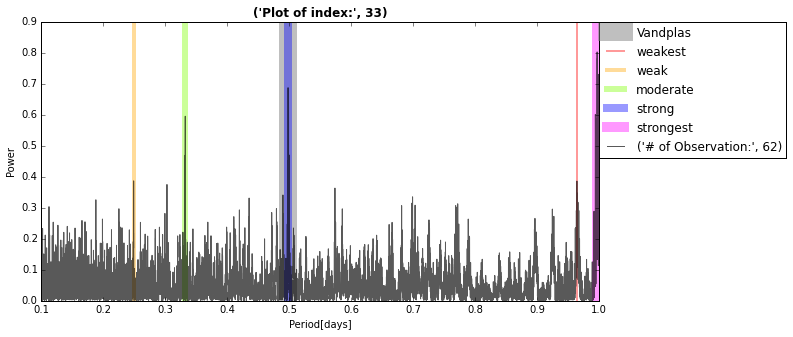

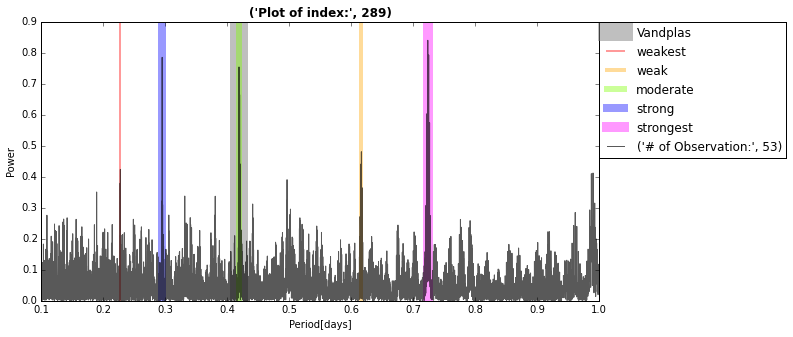

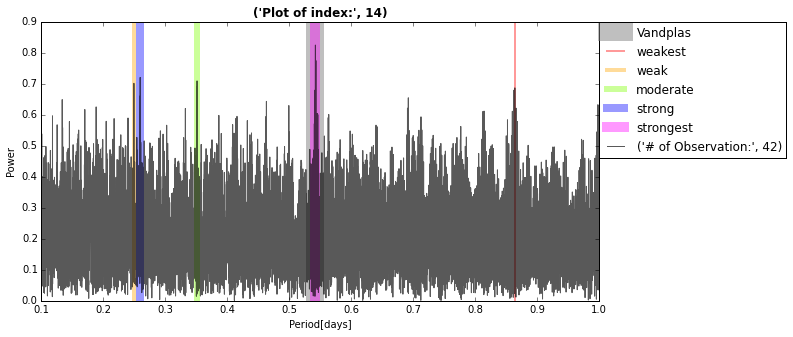

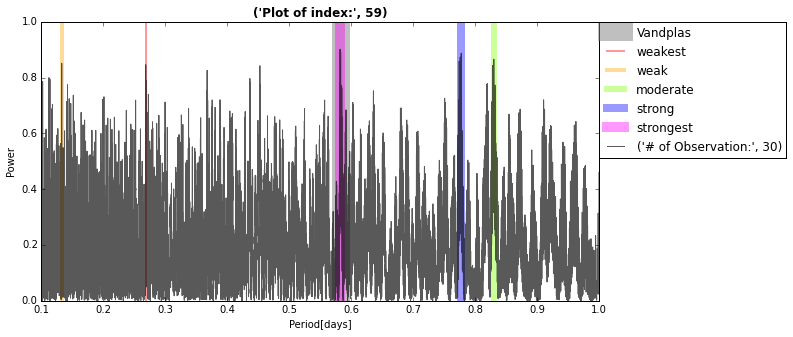

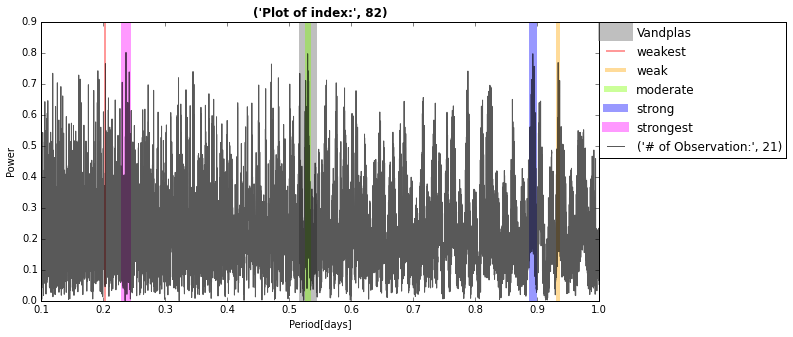

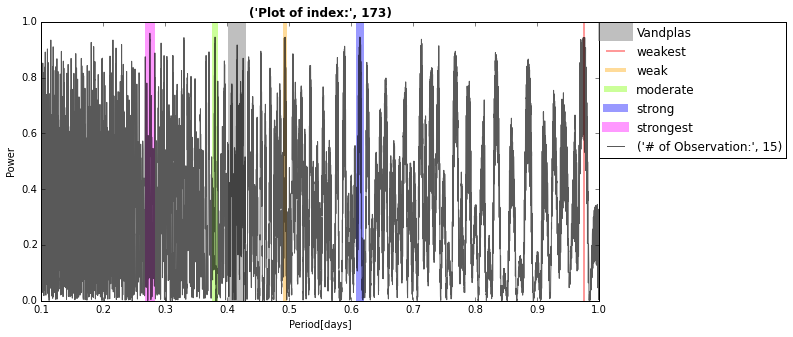

In [82]:
# Assignment 11
# Sort scores by argument 
# Basically redo Assignment 7 so that there are 5 strongest periods
# Remark :DONE !!!...

# Plot me the periodogram based on the index I give you
# This plots you a lot of periodograms
def plot_periodogram(i,model):
    # these are the ids of the rr lyrae
    lcid = rrlyrae.ids[i]
    metadata = rrlyrae.get_metadata(lcid)
    t, mag, dmag, filts = rrlyrae.get_lightcurve(lcid)
    
    # This is it, this is your LombScargle code !
    model = periodic.LombScargle(center_data=False,fit_offset=True)
    model.optimizer.period_range = (0.1, 1.)   
    
    # This is all fitted with 4.2 Truncated Fourier Models with VanderPlas paper
    model.fit(t[filts=='r'],mag[filts=='r'],dmag[filts=='r'])
    
    # Number of observations
    nobs = t[filts=='r'].size
    legend ='# of Observation:',nobs
    
    # Finding the periods, and then sorting it by argument of the strongest power(score)
    periods = np.linspace(0.1, 1., 10000)
    scores = model.score(periods)
    idx = np.argsort(scores)
    #tze_periods = periods[idx[-5:]]
    #tze_scores = scores[idx[-5:]]
    tze_periods = np.array([])
    threshold = 5E-3
    for period in periods[idx][::-1]:
        if (np.abs(tze_periods - period) > threshold).all() or (len(tze_periods) < 1):
            tze_periods = np.append(tze_periods, [period])
        
        if len(tze_periods) >= 5:
            break
    tze_periods = tze_periods[::-1]    
    #print(tze_periods)
    #print(tze_scores)
    
    # Compute the scores on a grid of periods
    plt.figure(figsize=(10,5))
    plt.axvline(metadata['P'],color='grey',linewidth=18,alpha=0.5,label='Vandplas')
    for j in range(5):
        # The marker color , going from weakest to strongest
        if j == 0: markercolor='red'
        if j == 1: markercolor='orange'
        if j == 2: markercolor='chartreuse'
        if j == 3: markercolor='blue'
        if j == 4: markercolor='magenta'
        if j == 0: word='weakest'
        if j == 1: word='weak'
        if j == 2: word='moderate'
        if j == 3: word='strong'
        if j == 4: word='strongest'     
        plt.axvline(tze_periods[j],color=markercolor,linewidth=2*j+2,alpha=0.4,label=word)   
    plt.plot(periods,scores,color = 'black',alpha=0.65,label = legend)
    
    # The axis
    plt.xlabel('Period[days]')
    plt.ylabel('Power')
    title = 'Plot of index:',i
    plt.title(title,fontweight='bold',fontsize=12)
    
    # The Legend
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc=2, borderaxespad=0.)
 
# Plot me lotsa periodograms

listoindex = [101,26,11,334,33,289,14,59,82,173]
#listoindex = [101]
for i in listoindex:
    plot_periodogram(i,model)
    
# Plot all the periodogram
#for i in range(len(rrlyrae.ids)):
#    plot_periodogram(i,model)
    


Finding optimal frequency:
 - Estimated peak width = 0.00432
 - Using 5 steps per peak; omega_step = 0.000864
 - User-specified period range:  0.1 to 1
 - Computing periods at 65437 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


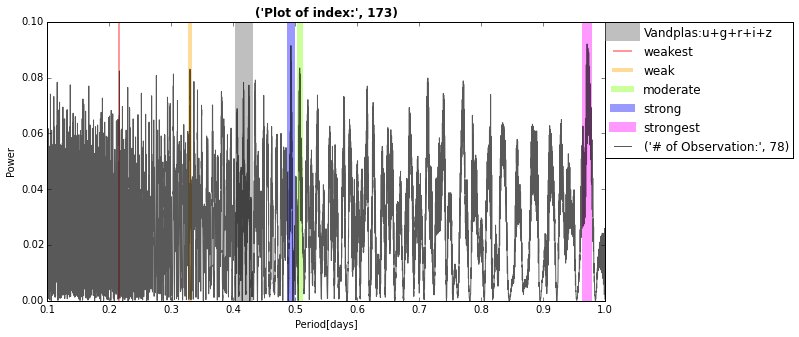

In [83]:
# Assignment 14

# Basically a redo of assignment 11, but with the multiband !!
# Do the same thing with LombScargleMultiband ( exactly as above ) , 
# on u,g,r,i,z stars.... but on all the colours combined !
# Try to make a periodogram of one of the stars, and now with the 5 best periods !
# Remark : DONE !!!!!!.... .... I think...
def plot_periodogram_multi(i,model):
    # these are the ids of the rr lyrae
    lcid = rrlyrae.ids[i]
    metadata = rrlyrae.get_metadata(lcid)
    t, mag, dmag, filts = rrlyrae.get_lightcurve(lcid)
    
    # Let's fit it
    model.optimizer.period_range = (0.1, 1.) 
    
    # This is all fitted with 4.2 Truncated Fourier Models with VanderPlas paper
    model.fit(t,mag,dmag)
    model.best_period
    
    # Number of observations
    nobs = t.size
    legend ='# of Observation:',nobs
    
    # Finding the periods, and then sorting it by argument of the strongest power(score)
    periods = np.linspace(0.1, 1., 10000)
    scores = model.score(periods)
    idx = np.argsort(scores)
    #tze_periods = periods[idx[-5:]]
    #tze_scores = scores[idx[-5:]]
    tze_periods = np.array([])
    threshold = 5E-3
    for period in periods[idx][::-1]:
        if (np.abs(tze_periods - period) > threshold).all() or (len(tze_periods) < 1):
            tze_periods = np.append(tze_periods, [period])
        
        if len(tze_periods) >= 5:
            break
    tze_periods = tze_periods[::-1]    
    #print(tze_periods)
    #print(tze_scores)
    
    # Compute the scores on a grid of periods
    plt.figure(figsize=(10,5))
    plt.axvline(metadata['P'],color='grey',linewidth=18,alpha=0.5,label='Vandplas:u+g+r+i+z')
    for j in range(5):
        # The marker color , going from weakest to strongest
        if j == 0: markercolor='red'
        if j == 1: markercolor='orange'
        if j == 2: markercolor='chartreuse'
        if j == 3: markercolor='blue'
        if j == 4: markercolor='magenta'
        if j == 0: word='weakest'
        if j == 1: word='weak'
        if j == 2: word='moderate'
        if j == 3: word='strong'
        if j == 4: word='strongest'     
        plt.axvline(tze_periods[j],color=markercolor,linewidth=2*j+2,alpha=0.4,label=word)   
    plt.plot(periods,scores,color = 'black',alpha=0.65,label = legend)

    # The axis
    plt.xlabel('Period[days]')
    plt.ylabel('Power')
    title = 'Plot of index:',i
    plt.title(title,fontweight='bold',fontsize=12)
    
    # The Legend
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc=2, borderaxespad=0.)
     

# This is it, this is your LombScargle code !
model = periodic.LombScargleMultiband(fit_period=True)

# Plot me those periodograms !!
#listofindex_multi = [101,26,11,334,33,289,14,59,82,173]
listofindex_multi=[173]
for i in listofindex_multi:
    plot_periodogram_multi(i,model)    
    

Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 149895 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00281
 - Using 5 steps per peak; omega_step = 0.000561
 - User-specified period range:  0.1 to 1
 - Computing periods at 100795 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00188
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 150164 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000378
 - User-specified period range:  0.1 to 1
 - Computing periods at 149448 steps
Zooming-in on 5 candidate peaks:
 - Comp

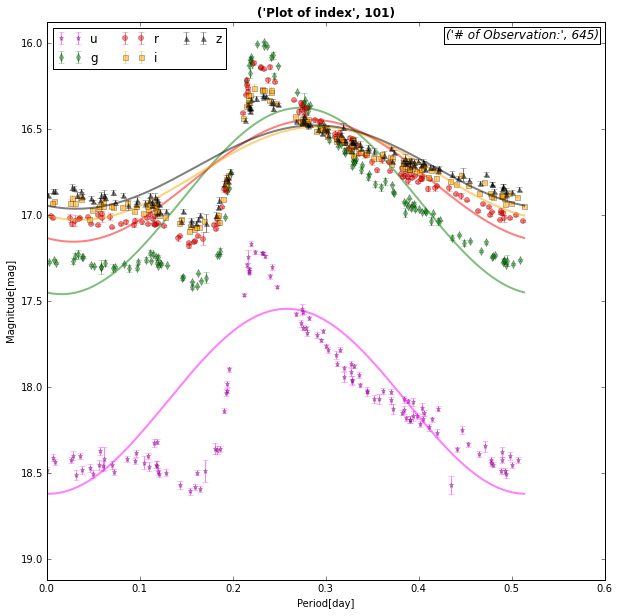

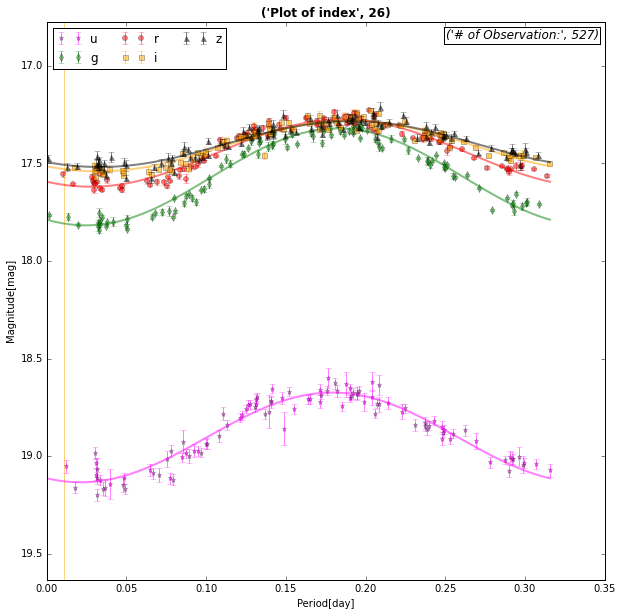

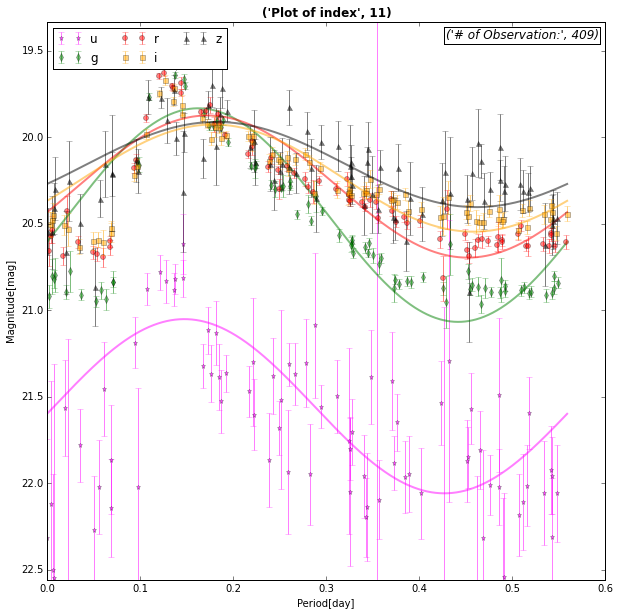

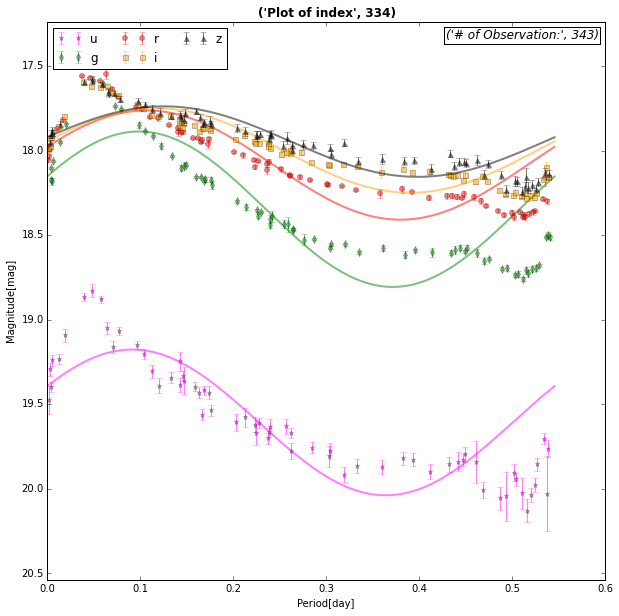

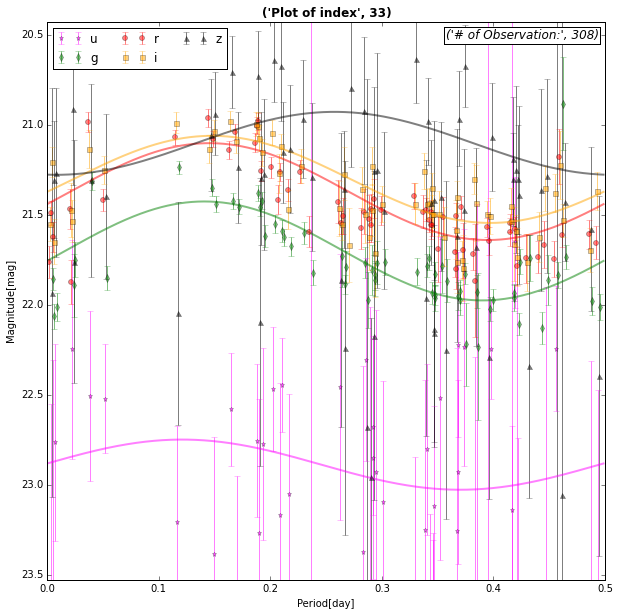

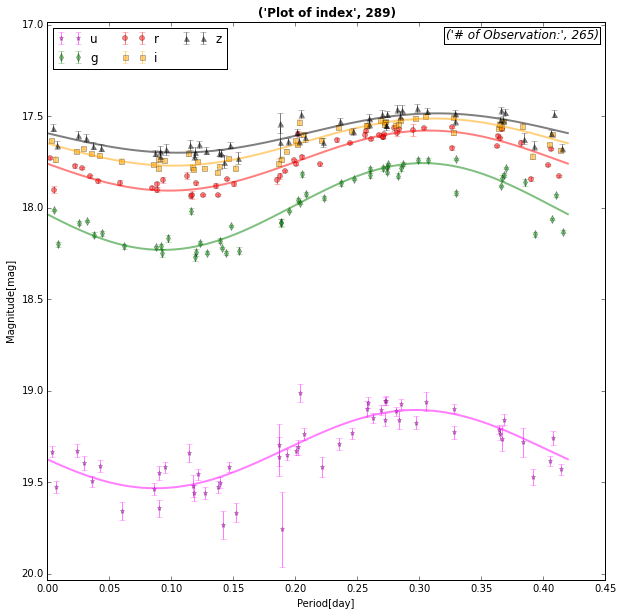

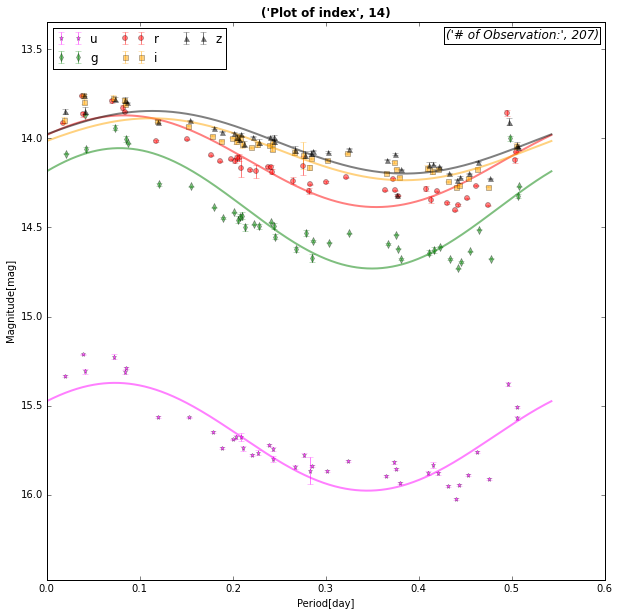

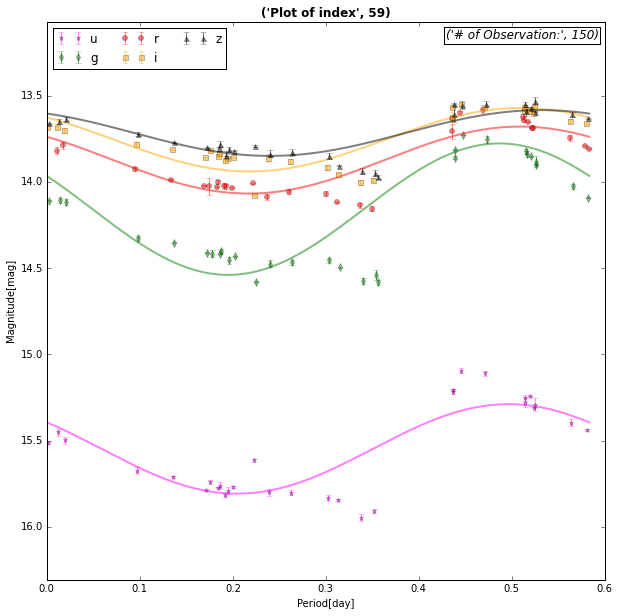

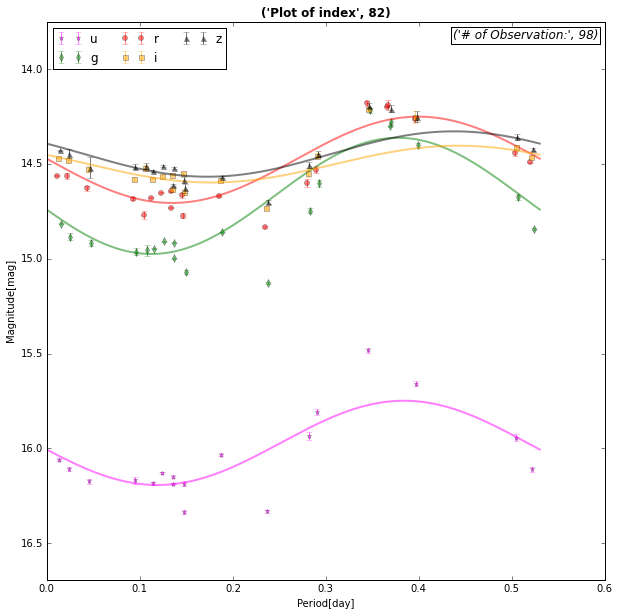

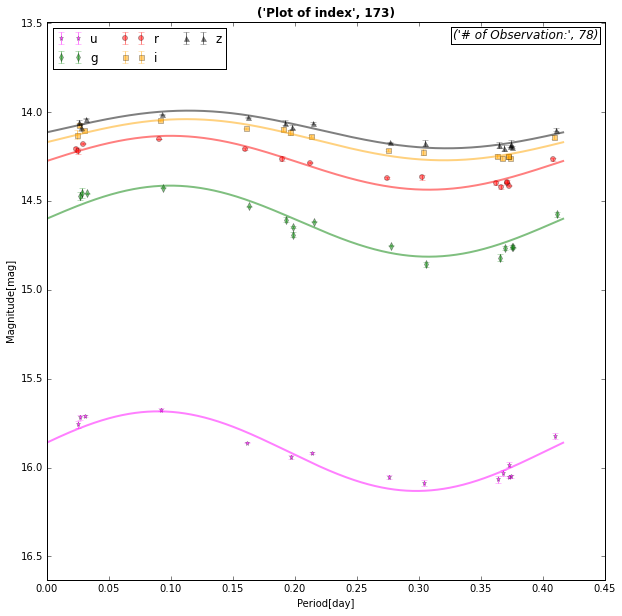

In [201]:
# Assignment 15

# Basically a redo of assignment 14, but with data folded phase.
# Do the same thing with LombScargleMultiband ( exactly as above ) , 
# on u,g,r,i,z stars.... but on all the colours combined !
# Try to make a periodogram of one of the stars, and now with the 5 best periods !

def plot_model(model, lcid):
    lcid = rrlyrae.ids[i]
    t, y, dy, filts = rrlyrae.get_lightcurve(lcid)
    
    # Fit me !!
    model.optimizer.period_range = (0.1, 1.) 
    model.fit(t, y, dy, filts)  
    
    # Specifying the period
    period = rrlyrae.get_metadata(lcid)['P']
    tfit = np.linspace(0, period, 1000)
    
    # Number of observations
    nobs = t.size
    obs_legend ='# of Observation:',nobs
    
    #Determining the y limits
    max_y=[]
    min_y=[] 
    
    # Plot me those light curves
    plt.figure(figsize=(10,10))
    for filt in 'ugriz':
        # Tell me your color choice
        if filt =='u' : markercolor='magenta'
        if filt =='g' : markercolor='green'
        if filt =='r' : markercolor='red'
        if filt =='i' : markercolor='orange'
        if filt =='z' : markercolor='black'
        if filt =='u' : markers='*'
        if filt =='g' : markers='d'
        if filt =='r' : markers='o'
        if filt =='i' : markers='s'
        if filt =='z' : markers='^'
        mask = (filts == filt)
        eb = plt.errorbar(t[mask] % period, y[mask], dy[mask], fmt=markers, color=markercolor, alpha=0.5,markersize=5,
                          label=filt)
        yfit = model.predict(tfit, filt, period=period)
        plt.plot(tfit, yfit, color=markercolor, alpha=0.5,linewidth=2)
        
        #Determining the y limits
        max_y.append(max(yfit))
        min_y.append(min(yfit))
    plt.ylim(min(min_y)-0.5,max(max_y)+0.5)
    plt.gca().invert_yaxis()
    
    # The axis
    plt.xlabel('Period[day]')
    plt.ylabel('Magnitude[mag]')
    
    # The Legend
    title = 'Plot of index',i
    plt.legend(ncol=3, loc='upper left')
    plt.title(title,fontweight='bold',fontsize=12)
    
    # The caption
    plt.figtext(.89,.89,obs_legend,ha='right',va='top',fontsize=12,style='italic',
                bbox={'facecolor':'white'})
  
# Plot me those periodograms !!
# This is my fit :
model = LombScargleMultiband(fit_period=True)
listofindex_multi = [101,26,11,334,33,289,14,59,82,173]
#listofindex_multi=[11,33,173]
for i in listofindex_multi:
    plot_model(LombScargleMultiband(fit_period=True), i)
    # Implied that (Nterms_base=1, Nterms_band=0)

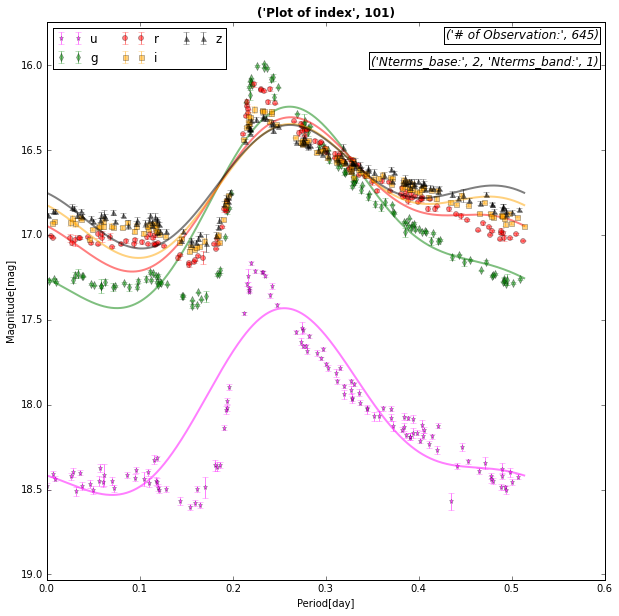

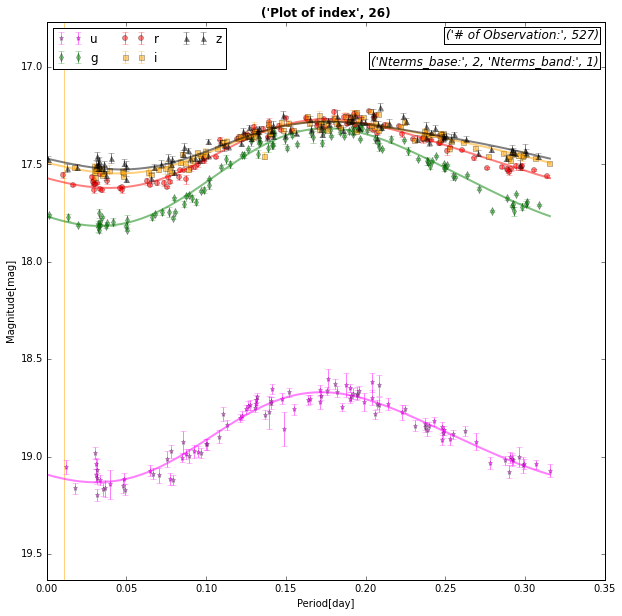

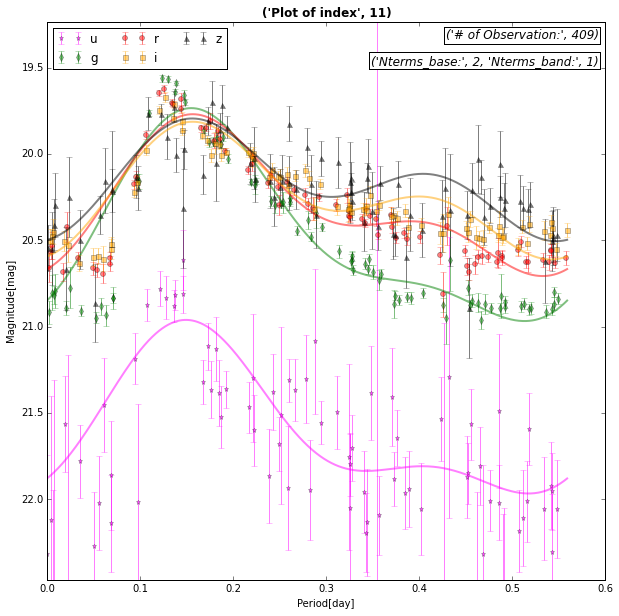

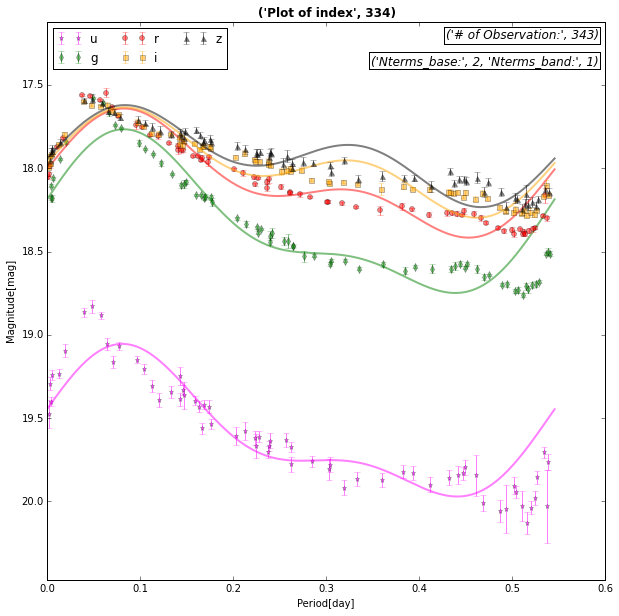

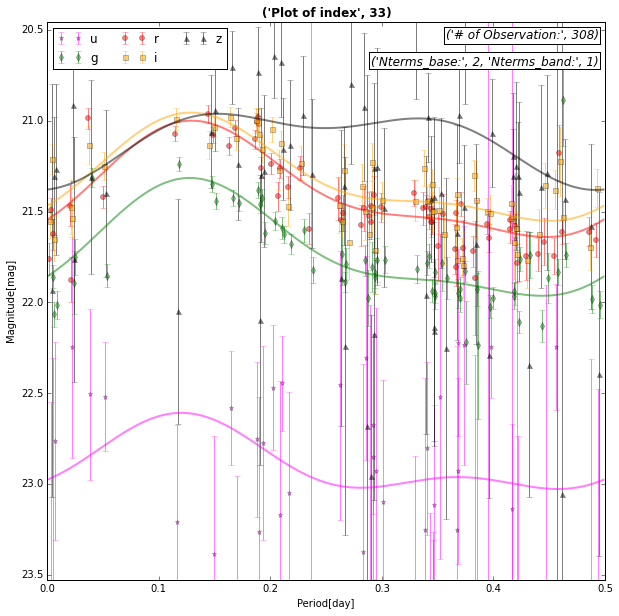

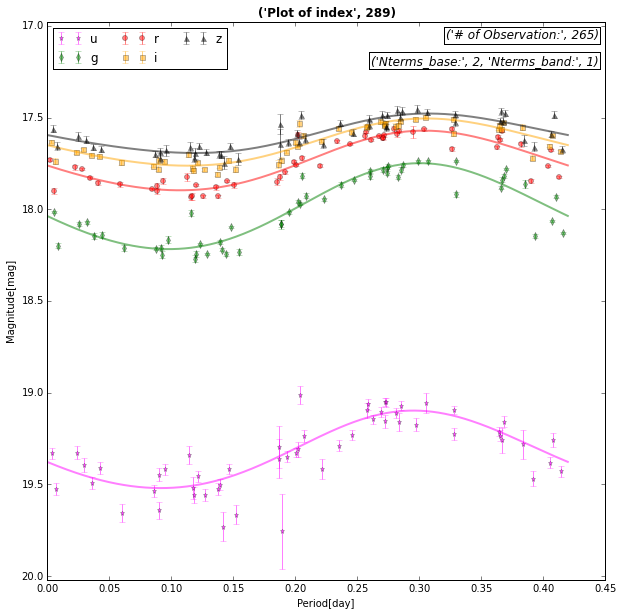

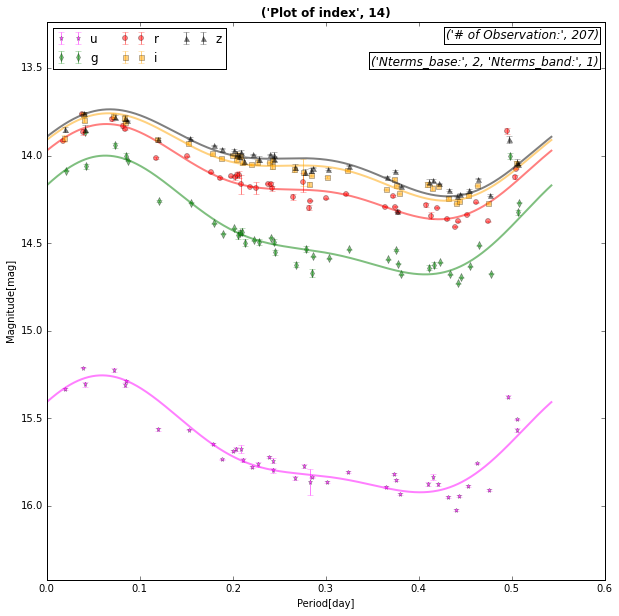

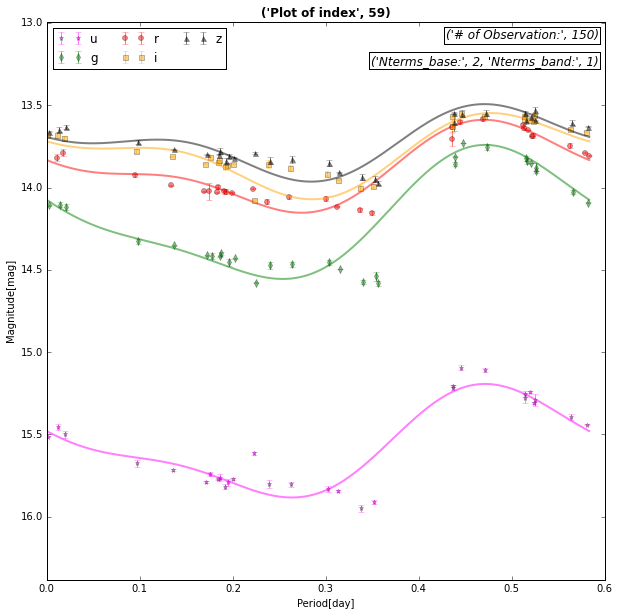

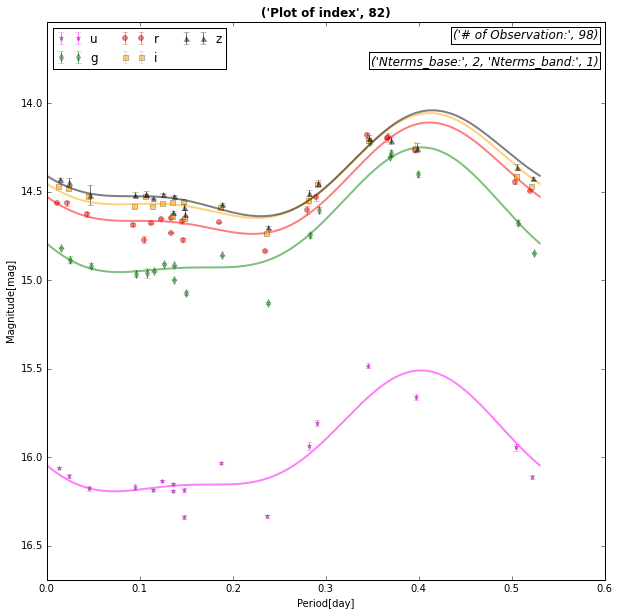

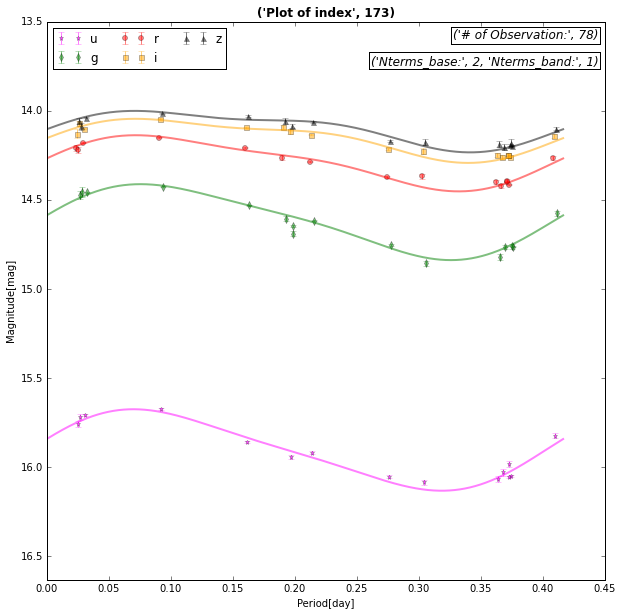

In [216]:
# Assignment 16

# Basically a redo of assignment 15, but with data folded phase.
# Do the same thing with LombScargleMultiband ( exactly as above ) ,
# But now, we will have more terms in the multiband fit !
# on u,g,r,i,z stars.... but on all the colours combined !
# Try to make a periodogram of one of the stars, and now with the 5 best periods !

def plot_model(model, lcid):
    lcid = rrlyrae.ids[i]
    t, y, dy, filts = rrlyrae.get_lightcurve(lcid)
    
    # Fit me !!
    model.optimizer.period_range = (0.1, 1.) 
    model.fit(t, y, dy, filts)  
    
    # Specifying the period
    period = rrlyrae.get_metadata(lcid)['P']
    tfit = np.linspace(0, period, 1000)
    
    # Number of observations
    nobs = t.size
    obs_legend ='# of Observation:',nobs
    
    #Determining the y limits
    max_y=[]
    min_y=[] 
    
    # Plot me those light curves
    plt.figure(figsize=(10,10))
    for filt in 'ugriz':
        # Tell me your color choice
        if filt =='u' : markercolor='magenta'
        if filt =='g' : markercolor='green'
        if filt =='r' : markercolor='red'
        if filt =='i' : markercolor='orange'
        if filt =='z' : markercolor='black'
        if filt =='u' : markers='*'
        if filt =='g' : markers='d'
        if filt =='r' : markers='o'
        if filt =='i' : markers='s'
        if filt =='z' : markers='^'
        mask = (filts == filt)
        eb = plt.errorbar(t[mask] % period, y[mask], dy[mask], fmt=markers, color=markercolor, alpha=0.5,markersize=5,
                          label=filt)
        yfit = model.predict(tfit, filt, period=6)
        plt.plot(tfit, yfit, color=markercolor, alpha=0.5,linewidth=2)
        
        #Determining the y limits
        max_y.append(max(yfit))
        min_y.append(min(yfit))
    plt.ylim(min(min_y)-0.5,max(max_y)+0.5)
    plt.gca().invert_yaxis()
    
    # The axis
    plt.xlabel('Period[day]')
    plt.ylabel('Magnitude[mag]')
    
    # The Legend
    title = 'Plot of index',i
    plt.legend(ncol=3, loc='upper left')
    plt.title(title,fontweight='bold',fontsize=12)
    
    # The caption
    multiterms = 'Nterms_base:',nterms_base,'Nterms_band:',nterms_band
    plt.figtext(.89,.89,obs_legend,ha='right',va='top',fontsize=12,style='italic',
                bbox={'facecolor':'white'})
    plt.figtext(.89,.855,multiterms,ha='right',va='top',fontsize=12,style='italic',
                bbox={'facecolor':'white'})
  
# Plot me those periodograms !!
# This is my fit :
model = LombScargleMultiband(fit_period=True)

# This is my list:
listofindex_multi = [101,26,11,334,33,289,14,59,82,173]
#listofindex_multi=[11]

# This is my fitting parameters :
#nterms_base=4
#nterms_band=1
nterms_base=2
nterms_band=1

for i in listofindex_multi:
    plot_model(LombScargleMultiband(Nterms_base=nterms_base, Nterms_band=nterms_band), i)

Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 149895 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00281
 - Using 5 steps per peak; omega_step = 0.000561
 - User-specified period range:  0.1 to 1
 - Computing periods at 100795 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00188
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 150164 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000378
 - User-specified period range:  0.1 to 1
 - Computing periods at 149448 steps
Zooming-in on 5 candidate peaks:
 - Comp

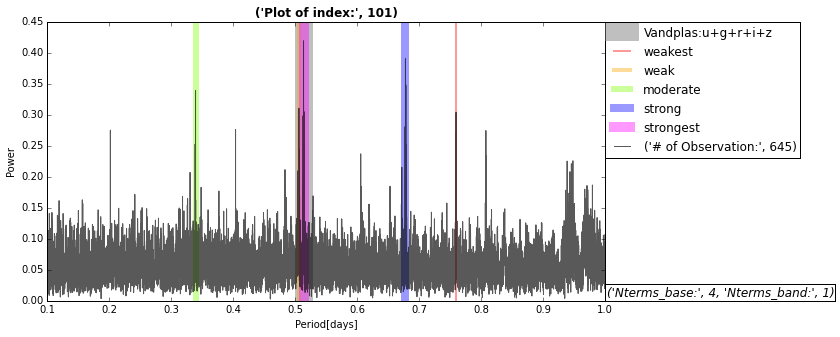

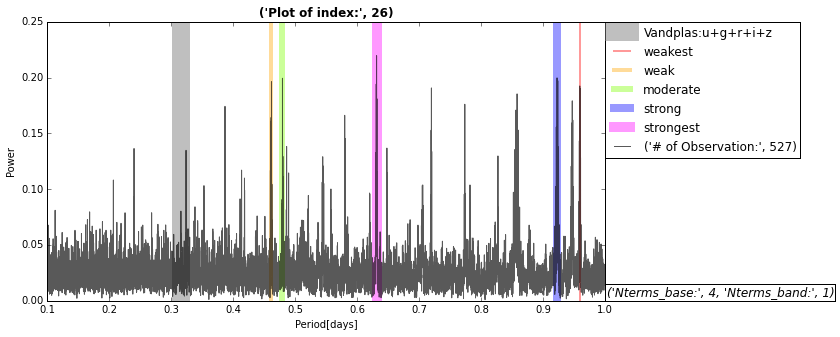

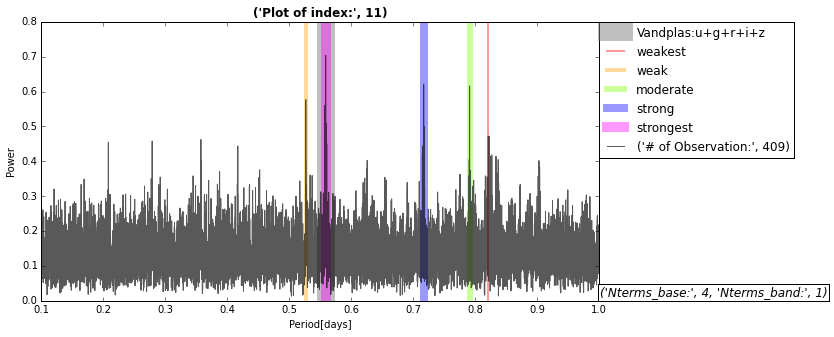

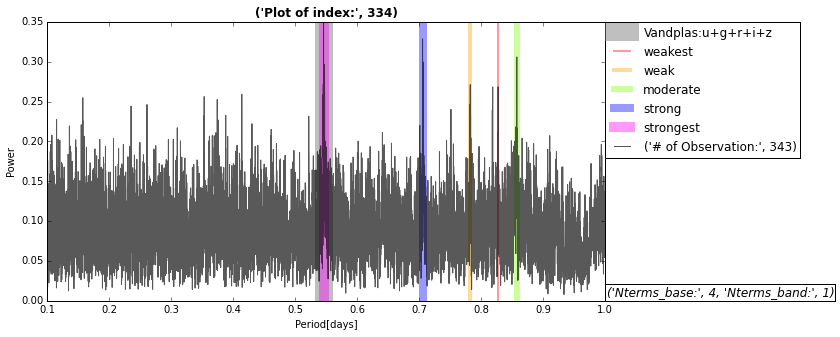

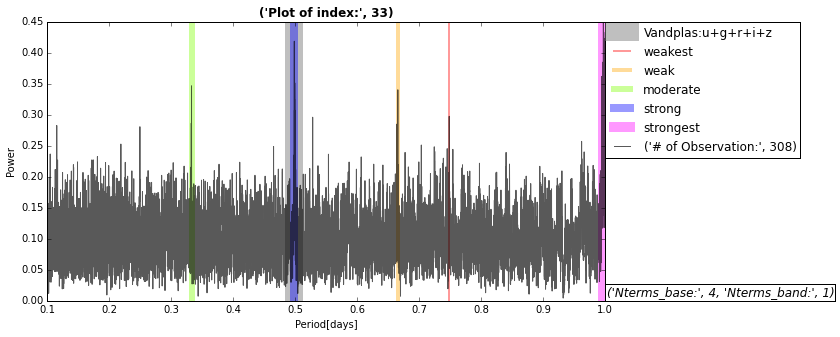

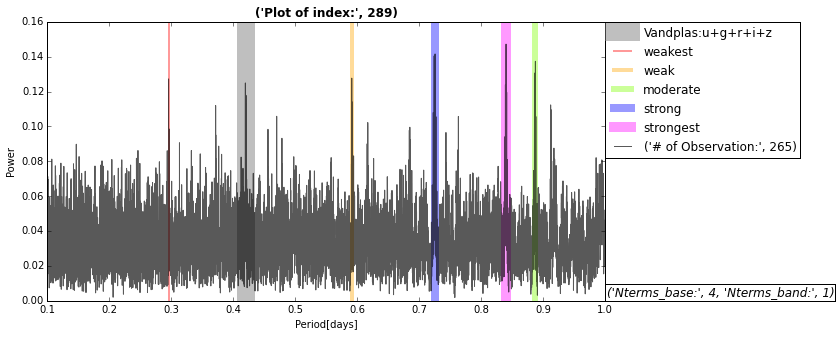

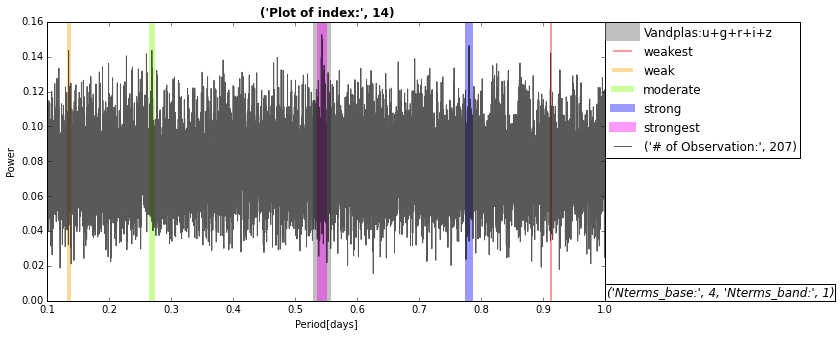

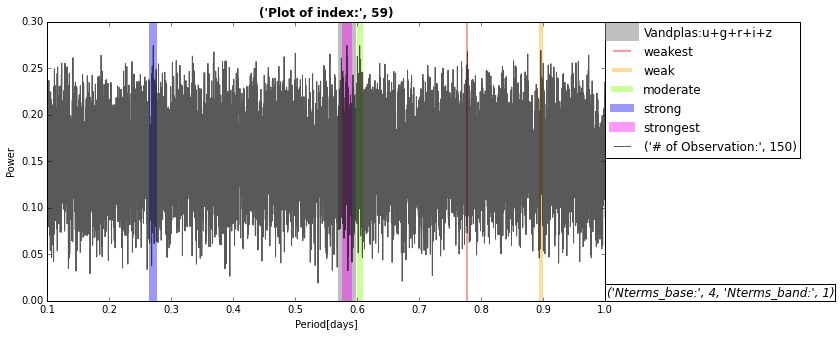

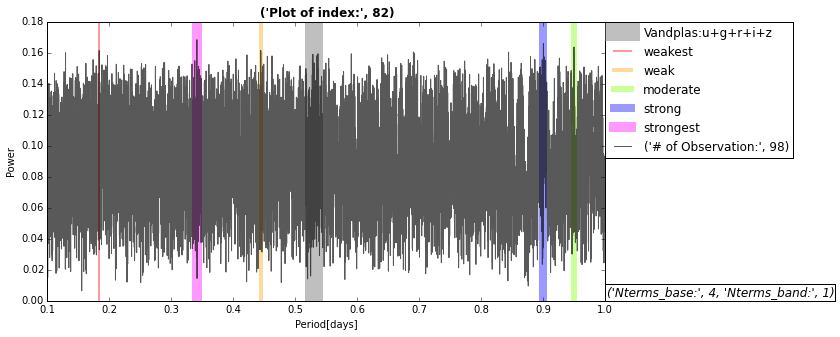

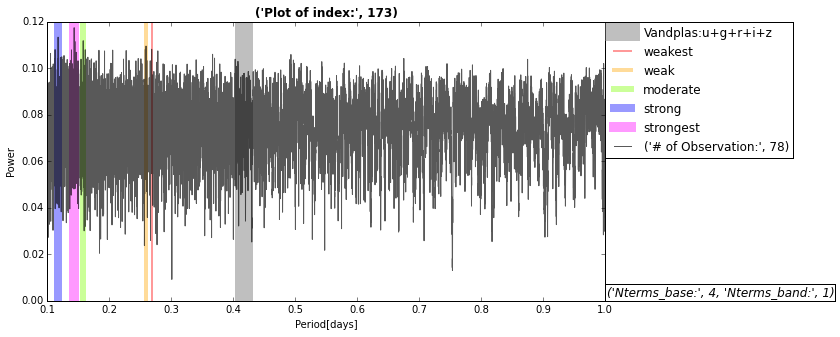

In [22]:
# Assignment 16b

# Basically a redo of assignment 16, but with data folded phase.
# Do the same thing with LombScargleMultiband ( exactly as above ) ,
# But now, we will have more terms in the multiband fit !
# Try to make a periodogram of one of the stars, and now with the 5 best periods !
# Remark : DONE !!!!!!.... .... I think...
def plot_periodogram_multi(i,model):
    # these are the ids of the rr lyrae
    lcid = rrlyrae.ids[i]
    metadata = rrlyrae.get_metadata(lcid)
    t, mag, dmag, filts = rrlyrae.get_lightcurve(lcid)
    
    # Let's fit it
    model.optimizer.period_range = (0.1, 1.) 
    
    # This is all fitted with 4.2 Truncated Fourier Models with VanderPlas paper
    model.fit(t,mag,dmag)
    model.best_period
    
    # Number of observations
    nobs = t.size
    legend ='# of Observation:',nobs
    
    # Finding the periods, and then sorting it by argument of the strongest power(score)
    periods = np.linspace(0.1, 1., 10000)
    scores = model.score(periods)
    idx = np.argsort(scores)
    #tze_periods = periods[idx[-5:]]
    #tze_scores = scores[idx[-5:]]
    tze_periods = np.array([])
    threshold = 5E-3
    for period in periods[idx][::-1]:
        if (np.abs(tze_periods - period) > threshold).all() or (len(tze_periods) < 1):
            tze_periods = np.append(tze_periods, [period])
        
        if len(tze_periods) >= 5:
            break
    tze_periods = tze_periods[::-1]    
    #print(tze_periods)
    #print(tze_scores)
    
    # Compute the scores on a grid of periods
    plt.figure(figsize=(10,5))
    plt.axvline(metadata['P'],color='grey',linewidth=18,alpha=0.5,label='Vandplas:u+g+r+i+z')
    for j in range(5):
        # The marker color , going from weakest to strongest
        if j == 0: markercolor='red'
        if j == 1: markercolor='orange'
        if j == 2: markercolor='chartreuse'
        if j == 3: markercolor='blue'
        if j == 4: markercolor='magenta'
        if j == 0: word='weakest'
        if j == 1: word='weak'
        if j == 2: word='moderate'
        if j == 3: word='strong'
        if j == 4: word='strongest'     
        plt.axvline(tze_periods[j],color=markercolor,linewidth=2*j+2,alpha=0.4,label=word)   
    plt.plot(periods,scores,color = 'black',alpha=0.65,label = legend)

    # The axis
    plt.xlabel('Period[days]')
    plt.ylabel('Power')
    title = 'Plot of index:',i
    plt.title(title,fontweight='bold',fontsize=12)
    
    # The Legend
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc=2, borderaxespad=0.)
    
    # The caption
    multiterms = 'Nterms_base:',nterms_base,'Nterms_band:',nterms_band
    plt.figtext(.902,.13,multiterms,ha='left',va='bottom',fontsize=12,style='italic',
                bbox={'facecolor':'white'})
     
# Plot me those periodograms !!

# This is my fitting parameters :
nterms_base=4
nterms_band=1
#nterms_base=2
#nterms_band=1

# This is it, this is your LombScargle code !
model = periodic.LombScargleMultiband(Nterms_base=nterms_base, Nterms_band=nterms_band)

# The list
listofindex_multi = [101,26,11,334,33,289,14,59,82,173]
#listofindex_multi=[173]

# Plot me !!!
for i in listofindex_multi:
    plot_periodogram_multi(i,model)    

   

Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 149895 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 149895 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 149895 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 149895 steps
Zooming-in on 5 candidate peaks:
 - Comp

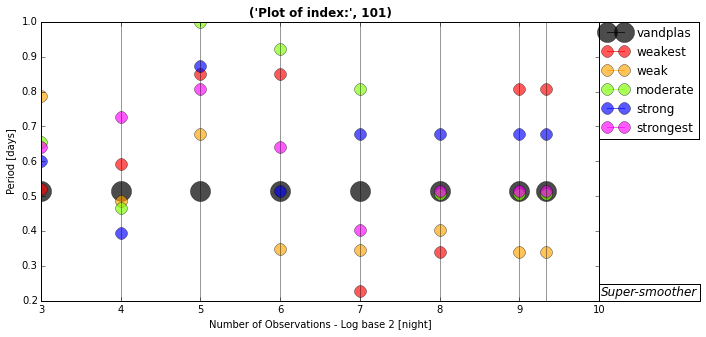

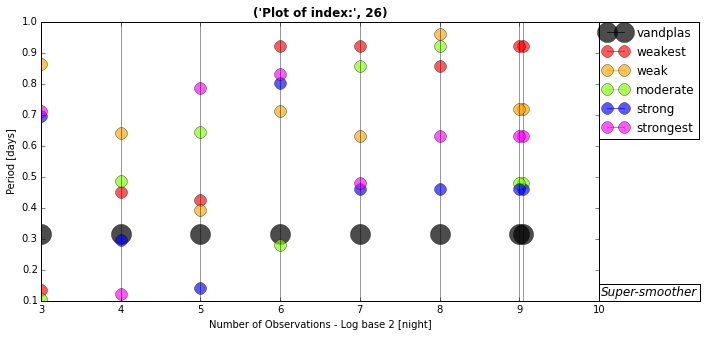

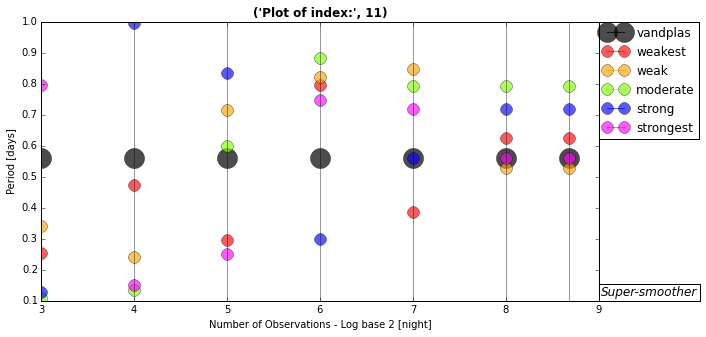

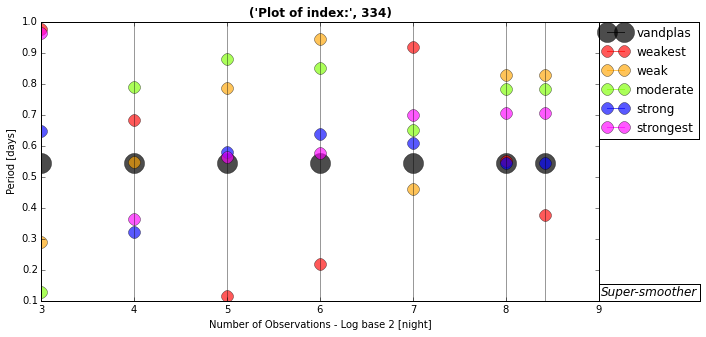

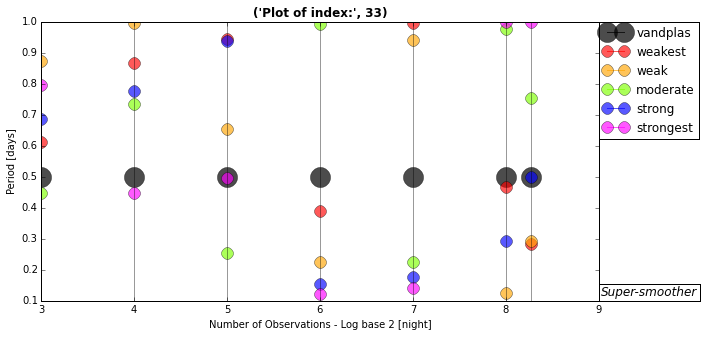

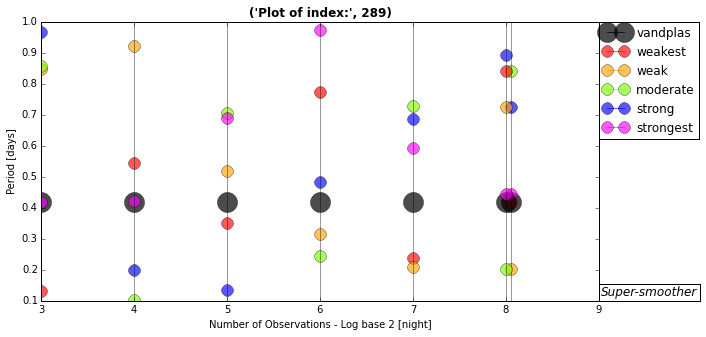

In [8]:
#Assignment 18

#" Down-sampling "

#Play with parameters, make something interesting to myself. 
#Take index 101 ( 600 Observations )
#Down-sample it randomly  to [512, 256,128, 64,32,16,8] observations
def plot_periodogram_multi(i,model):
    # these are the ids of the rr lyrae
    idx_of_plot = i
    lcid = rrlyrae.ids[i]
    metadata = rrlyrae.get_metadata(lcid)
    t, mag, dmag, filts = rrlyrae.get_lightcurve(lcid)
    
    # Number of observations - original size
    nobs = t.size
    
    # The Down-Sampled Array
    down_sample_array = 2**np.arange(3,10)
    down_sample_array = down_sample_array[::-1]
    down_sample_array = np.insert(down_sample_array, 0, nobs) 
    down_sample_list = down_sample_array.tolist()
    down_sample_list[:] = (value for value in down_sample_list if value <= nobs)
    down_sample_array = np.asarray(down_sample_list)
    #down_sample_array = [ 32 , 16,   8]
    
    # Number of Observations + down-sampled 5 best periods to be returned
    returned_list=[]
    
    # Let's plot out the down-sampled data    
    for items in down_sample_array:
        
        # Down-sampling the data !!
        nobs = items
        legend ='# of Observation:',nobs
        dd = random.sample(zip(t,mag,dmag), nobs)
        # Shuffling the random sample back to their respective houses 
        ee = []
        ff= []
        gg = []
        for i in range(len(dd)):
            ee.append(dd[i][0])
            ff.append(dd[i][1])
            gg.append(dd[i][2])
        t = np.asarray(ee)   
        mag = np.asarray(ff)
        dmag = np.asarray(gg)
            
        # Let's fit it
        model.optimizer.period_range = (0.1, 1.) 
    
        # This is all fitted with 4.2 Truncated Fourier Models with VanderPlas paper
        model.fit(t,mag,dmag)
        model.best_period  
        
        # Finding the periods, and then sorting it by argument of the strongest power(score)
        periods = np.linspace(0.1, 1., 10000)
        scores = model.score(periods)
        idx = np.argsort(scores)
        #tze_periods = periods[idx[-5:]]
        #tze_scores = scores[idx[-5:]]
        tze_periods = np.array([])
        threshold = 5E-3
        for period in periods[idx][::-1]:
            if (np.abs(tze_periods - period) > threshold).all() or (len(tze_periods) < 1):
                tze_periods = np.append(tze_periods, [period])
        
            if len(tze_periods) >= 5:
                break
        tze_periods = tze_periods[::-1]    
        #print(tze_periods)
        #print(tze_scores)
        
        # Getting the infomation to be returned
        combo = nobs,tze_periods,metadata['P']
        returned_list.append(combo)
        
        # Compute the scores on a grid of periods
#        plt.figure(figsize=(10,5))
#        plt.axvline(metadata['P'],color='grey',linewidth=18,alpha=0.5,label='Vandplas:u+g+r+i+z')
#        for j in range(5):
#            # The marker color , going from weakest to strongest
#            if j == 0: markercolor='red'
#            if j == 1: markercolor='orange'
#            if j == 2: markercolor='chartreuse'
#            if j == 3: markercolor='blue'
#            if j == 4: markercolor='magenta'
#            if j == 0: word='weakest'
#            if j == 1: word='weak'
#            if j == 2: word='moderate'
#            if j == 3: word='strong'
#            if j == 4: word='strongest'     
#            plt.axvline(tze_periods[j],color=markercolor,linewidth=2*j+2,alpha=0.4,label=word)   
#        plt.plot(periods,scores,color = 'black',alpha=0.65,label = legend)

#        # The axis
#        plt.xlabel('Period[days]')
#        plt.ylabel('Power')
#        title = 'Plot of index:',idx_of_plot
#        plt.title(title,fontweight='bold',fontsize=12)
    
#        # The Legend
#        plt.legend(bbox_to_anchor=(1.0, 1.0), loc=2, borderaxespad=0.)
    
#        # The caption
#        multiterms = 'Nterms_base:',nterms_base,'Nterms_band:',nterms_band
#        plt.figtext(.902,.13,multiterms,ha='left',va='bottom',fontsize=12,style='italic',
#                    bbox={'facecolor':'white'})
        
    return returned_list


# Plot me those periodograms !!

# This is my fitting parameters :
#nterms_base=4
#nterms_band=1
nterms_base=2
nterms_band=1

# This is it, this is your LombScargle code !
#model = periodic.LombScargleMultiband(Nterms_base=nterms_base, Nterms_band=nterms_band)
model = periodic.SuperSmoother(fit_period=True)

# The list
#listofindex_multi = [101,26,11,334,33,289,14,59,82,173]
listofindex_multi = [101,26,11,334,33,289]
#listofindex_multi=[11]

# Plot me !!!
for i in listofindex_multi:
    plot_of_nobs_vs_5_best = plot_periodogram_multi(i,model) 
    
    # Plot me those 5 best periods against Number of Observations
    plt.figure(figsize=(10,5))
    legend_counter=0
    for items in plot_of_nobs_vs_5_best:

        nobs = items[0] 
        nobs = np.log(nobs)/np.log(2)
        tze_periods = items[1]
        vandplas_periods = items[2]
    
        
        # Gimme those plots !!!!
        plt.plot(nobs,vandplas_periods,marker = 'o', color = 'black', 
                markersize = 20,alpha=0.7,label='vandplas'if legend_counter == 0 else "" )
        for j in range(5):
            # The marker color , going from weakest to strongest
            if j == 0: markercolor='red'
            if j == 1: markercolor='orange'
            if j == 2: markercolor='chartreuse'
            if j == 3: markercolor='blue'
            if j == 4: markercolor='magenta'
            if j == 0: word='weakest'
            if j == 1: word='weak'
            if j == 2: word='moderate'
            if j == 3: word='strong'
            if j == 4: word='strongest'        
            plt.plot(nobs,tze_periods[j],marker = 'o', color =markercolor, 
                     markersize = 12,alpha=0.65,label=word if legend_counter == 0 else "" )
        legend_counter = 1
        plt.axvline(nobs,color='black',alpha=0.4)
        
        # The axis
        plt.xlabel('Number of Observations - Log base 2 [night]')
        plt.ylabel('Period [days]')
        title = 'Plot of index:',i
        plt.title(title,fontweight='bold',fontsize=12)
        
        # The Legend
        plt.legend(bbox_to_anchor=(1.0, 1.0), loc=2, borderaxespad=0.)
        
        # The caption
        name = 'Super-smoother'
        plt.figtext(.903,.13,name,ha='left',va='bottom',fontsize=12,style='italic',
                bbox={'facecolor':'white'})
        

In [41]:
# Assignment z

# This is my list:
listofindex_multi = [101,26,11,334,33,289,14,59,82,173]

for i in listofindex_multi:
    lcid = rrlyrae.ids[i]
    t, y, dy, filts = rrlyrae.get_lightcurve(lcid)
    r_mag = y[filts =='r']
    g_mag = y[filts =='g']
    print(i,np.median(r_mag),np.median(g_mag),"\n")
    

101 16.844 16.982 

26 17.377 17.498 

11 20.416 20.7135 

334 18.1135 18.438 

33 21.51 21.825 

289 17.758 18.013 

14 14.171 14.4965 

59 13.9565 14.339 

82 14.627 14.871 

173 14.284 14.6315 

